In [1]:
using IntervalSets
using Distributions
using Random, LinearAlgebra, Statistics, Distributions, StatsBase, ArraysOfArrays
using JLD2
using ValueShapes
using TypedTables
using Measurements
using TypedTables
using HypothesisTests
using LaTeXStrings
using HDF5
using CSV
using MultivariateStats
using HypothesisTests

In [2]:
# using PyPlot
using Plots
pyplot()

Plots.PyPlotBackend()

In [3]:
using PyPlot

In [4]:
using BAT

In [117]:
iid_samples_1 = bat_sample(NamedTupleDist(a=Normal()), 10^3).result;
iid_samples_2 = bat_sample(NamedTupleDist(a=Normal()), 10^3).result;

┌ Info: Initializing new RNG of type Random123.Philox4x{UInt64,10}
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/algotypes/bat_default.jl:44
┌ Info: Using sampling algorithm RandSampling()
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/algotypes/bat_default.jl:44
┌ Info: Initializing new RNG of type Random123.Philox4x{UInt64,10}
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/algotypes/bat_default.jl:44
┌ Info: Using sampling algorithm RandSampling()
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/algotypes/bat_default.jl:44


In [118]:
# mcmc_samples = bat_sample(PosteriorDensity(x -> LogDVal(0.0), NamedTupleDist(a=Normal())), (1000, 10), MetropolisHastings()).result;

In [119]:
iid_flat_1 = collect(flatview(unshaped.(iid_samples_1.v))[1,:]);
iid_flat_2 = collect(flatview(unshaped.(iid_samples_2.v))[1,:]);
mcmc_flat, mcmc_w = collect(flatview(unshaped.(mcmc_samples.v))[1,:]), mcmc_samples.weight;

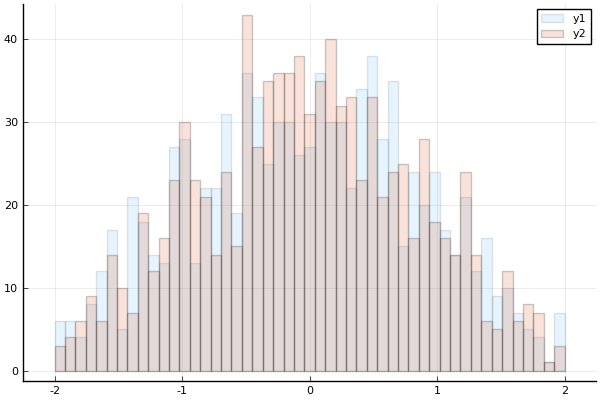

In [129]:
bins = range(-2,stop=2, length=50)
hist_iid_1 = fit(Histogram, iid_flat_1, bins)
hist_iid_2 = fit(Histogram, iid_flat_2, bins)
# hist_iid_1 = normalize(hist_iid_1, mode=:pdf)
# hist_iid_2 = normalize(hist_iid_2, mode=:pdf)
hist_mcmc = fit(Histogram, mcmc_flat, weights(mcmc_w), bins)

Plots.plot(hist_iid_1, alpha=0.1)
Plots.plot!(hist_iid_2, alpha=0.2)
# Plots.plot!(hist_mcmc, alpha=0.1)

In [131]:
pvalue(ChisqTest(hcat(hist_iid_1.weights, hist_iid_2.weights)))

0.35335745229724663

In [132]:
ChisqTest(hcat(hist_iid_1.weights, hist_iid_2.weights))

Pearson's Chi-square Test
-------------------------
Population details:
    parameter of interest:   Multinomial Probabilities
    value under h_0:         [0.002378411749487287, 0.002642679721652541, 0.002642679721652541, 0.00449255552680932, 0.004756823498974574, 0.008192307137122877, 0.003964019582478811, 0.007399503220627115, 0.009777914970114402, 0.006870967276296607  …  0.011817108797347549, 0.006827662860689695, 0.005777253189814357, 0.0036764338480636816, 0.005777253189814357, 0.0034138314303448474, 0.0034138314303448474, 0.0028886265949071787, 0.0005252048354376688, 0.002626024177188344]
    point estimate:          [0.003161222339304531, 0.003161222339304531, 0.002107481559536354, 0.004214963119072708, 0.006322444678609062, 0.008956796628029505, 0.0026343519494204425, 0.011064278187565859, 0.009483667017913594, 0.007376185458377239  …  0.012644889357218124, 0.007376185458377239, 0.003161222339304531, 0.0026343519494204425, 0.006322444678609062, 0.003161222339304531, 0.0042149



# Use Flux to do Logistic Regression on the Iris dataset

This is a very simple model, with a single layer that outputs to softmax.

Logistic regression can basically be thought of as a [single layer neural network](https://sebastianraschka.com/faq/docs/logisticregr-neuralnet.html).

## Data Source

The data source is Fisher's classic dataset, retrieved from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/iris).

## Usage

`cd` into `model-zoo/other/iris`, start the Julia REPL and instantiate the environment:

```julia

julia> using Pkg; Pkg.activate("."); Pkg.instantiate()

```

Then train and evaluate the model:

```julia

julia> include("iris.jl")
Starting training.

Accuracy: 0.94

Confusion Matrix:

3×3 Array{Int64,2}:
 16   0   0
  0  16   1
  0   2  15

julia>

```
